In [1]:
pip install --upgrade scikit-learn lightgbm

In [2]:
# Langkah 1: Impor Library yang Dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import joblib

In [3]:
df = pd.read_csv('/content/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


DATASET :
- dteday : date
- season : 1:winter, 2:spring, 3:summer, 4:fall
- hr : hours(0-23)
- holiday : weather day is holiday or not (binary)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0
- weathersit : - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- temp : temperature in celcius
- atemp : Normalized feeling temperature in Celsius
- hum : humidity
- windspeed : Normalized wind speed. The values are divided to 67 (max)
- casual : count of casual users
- registered : count of registered users
- cnt :  count of total rental bikes including both casual and registered (target column)


In [4]:
df.shape

(17379, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    mask_outlier = (df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))
    count_outlier = mask_outlier.sum()
    perc = count_outlier / len(df) * 100
    print(f'{col} : {count_outlier} outliers ({perc:.2f}%)')

instant : 0 outliers (0.00%)
season : 0 outliers (0.00%)
yr : 0 outliers (0.00%)
mnth : 0 outliers (0.00%)
hr : 0 outliers (0.00%)
holiday : 500 outliers (2.88%)
weekday : 0 outliers (0.00%)
workingday : 0 outliers (0.00%)
weathersit : 3 outliers (0.02%)
temp : 0 outliers (0.00%)
atemp : 0 outliers (0.00%)
hum : 22 outliers (0.13%)
windspeed : 342 outliers (1.97%)
casual : 1192 outliers (6.86%)
registered : 680 outliers (3.91%)
cnt : 505 outliers (2.91%)


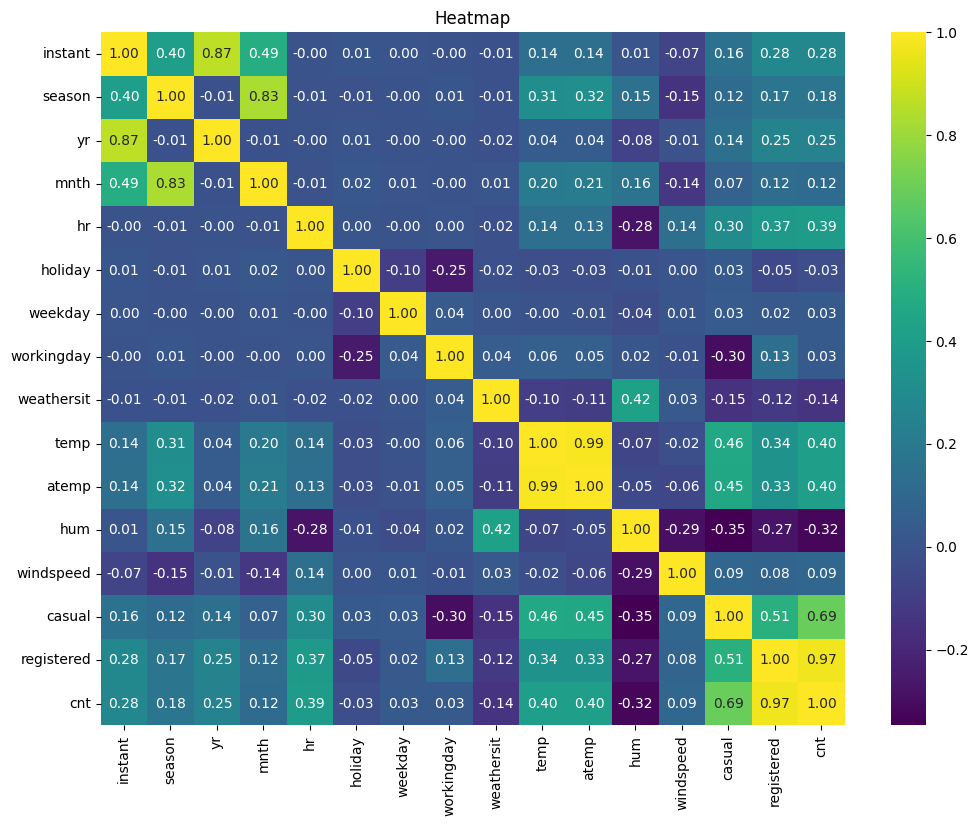

In [10]:
correlation_matrix = df[num_col].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Heatmap")
plt.show()

DATA PREPROCESSING

In [11]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['month'] = df['dteday'].dt.month
df['day_of_week'] = df['dteday'].dt.dayofweek
df['year'] = df['dteday'].dt.year

In [13]:
df = df.drop(['instant', 'dteday', 'casual', 'registered', 'atemp', 'yr', 'mnth', 'weekday'], axis=1)

In [14]:
df.head()

,season,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,month,day_of_week,year
0,1,0,0,0,1,0.24,0.81,0.0,16,1,5,2011
1,1,1,0,0,1,0.22,0.80,0.0,40,1,5,2011
2,1,2,0,0,1,0.22,0.80,0.0,32,1,5,2011
3,1,3,0,0,1,0.24,0.75,0.0,13,1,5,2011
4,1,4,0,0,1,0.24,0.75,0.0,1,1,5,2011


In [15]:
df_handled = df.copy()
columns_to_handle = ['hum', 'windspeed', 'cnt']

for col in columns_to_handle:
  Q1 = df_handled[col].quantile(0.25)
  Q3 = df_handled[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers_count = ((df_handled[col] < lower_bound) | (df_handled[col] > upper_bound)).sum()

  if outliers_count > 0:
    df_handled[col] = np.clip(df_handled[col], lower_bound, upper_bound)
    new_outlier = ((df_handled[col] < lower_bound) | (df_handled[col] > upper_bound)).sum()
    print(f"{col} : {new_outlier}")
  else:
    print(f"{col} no outlier")


hum : 0
windspeed : 0
cnt : 0


In [16]:
X = df_handled.drop('cnt', axis=1)
y = df_handled['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modeling

In [17]:
lgbm = lgb.LGBMRegressor(random_state=42)

lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 212
[LightGBM] [Info] Number of data points in the train set: 13903, number of used features: 11
[LightGBM] [Info] Start training from score 187.443394


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [18]:
y_pred = lgbm.predict(X_test)
y_pred_train = lgbm.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test= mean_absolute_error(y_test, y_pred)

print(f"MAE pada Data Train: {mae_train:.2f}")
print(f"MAE pada Data Test : {mae_test:.2f}")

MAE pada Data Train: 22.90
MAE pada Data Test : 24.26


Feature Engineering

In [19]:
rush_hours = [7, 8, 9, 16, 17, 18, 19]

df_handled['rush_hours'] = df_handled['hr'].apply(lambda hour: 1 if hour in rush_hours else 0)

def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 1  # Pagi
    elif 12 <= hour < 17:
        return 2  # Siang
    elif 17 <= hour < 22:
        return 3  # Sore
    else:
        return 4  # Malam

df_handled['part_of_day'] = df_handled['hr'].apply(get_part_of_day)

df_handled['day_interaction'] = df_handled['part_of_day'] * 10 + df_handled['workingday']

In [20]:
df_handled.head(10)

,season,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,month,day_of_week,year,rush_hours,part_of_day,day_interaction
0,1,0,0,0,1,0.24,0.81,0.0000,16.0,1,5,2011,0,4,40
1,1,1,0,0,1,0.22,0.80,0.0000,40.0,1,5,2011,0,4,40
2,1,2,0,0,1,0.22,0.80,0.0000,32.0,1,5,2011,0,4,40
3,1,3,0,0,1,0.24,0.75,0.0000,13.0,1,5,2011,0,4,40
4,1,4,0,0,1,0.24,0.75,0.0000,1.0,1,5,2011,0,4,40
5,1,5,0,0,2,0.24,0.75,0.0896,1.0,1,5,2011,0,1,10
6,1,6,0,0,1,0.22,0.80,0.0000,2.0,1,5,2011,0,1,10
7,1,7,0,0,1,0.20,0.86,0.0000,3.0,1,5,2011,1,1,10
8,1,8,0,0,1,0.24,0.75,0.0000,8.0,1,5,2011,1,1,10
9,1,9,0,0,1,0.32,0.76,0.0000,14.0,1,5,2011,1,1,10


Model Improvement

In [21]:
X = df_handled.drop('cnt', axis=1)
y = df_handled['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
lgbm_improved = lgb.LGBMRegressor(
    objective='regression_l1',
    n_estimators=2000,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42
)

lgbm_improved.fit(X_train, y_train,
         eval_set=[(X_test, y_test)],
         eval_metric='mae',
         callbacks=[lgb.early_stopping(100, verbose=True)])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 13903, number of used features: 14
[LightGBM] [Info] Start training from score 143.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1978]	valid_0's l1: 21.7253


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,2000
,subsample_for_bin,200000
,objective,'regression_l1'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [23]:
y_pred = lgbm_improved.predict(X_test)
y_pred_train = lgbm_improved.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test= mean_absolute_error(y_test, y_pred)

print(f"MAE pada Data Train: {mae_train:.2f}")
print(f"MAE pada Data Test : {mae_test:.2f}")

MAE pada Data Train: 16.02
MAE pada Data Test : 21.73


In [24]:
joblib.dump(lgbm_improved, 'bike_demand.pkl')

['bike_demand.pkl']